# Supervised Learning Project Thera Bank:

## Objective: The Classification Goal is to predict likelihood of a Liability Customer Buying Personal Loans?

#### Importing Libraries:


In [254]:
#To enable plotting the graphs in Jupyter Notebook:
%matplotlib inline
import numpy as np                 # Multi Dimensional Array Handling
import pandas as pd                # Array and Dataframe Handling
import matplotlib.pyplot as plt    
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### Loading the Dataframe and checking its Shape:


In [255]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [256]:
#Understanding the width and Depth of the Dataset:
bank_df.shape

(5000, 14)

### Task1: Reading and Understanding  Each Attribute:

In [257]:
#Getting the datatypes of Attributes of the Dataset:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [258]:
#Summarizing the Data:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Checking Data Distribution based on the Class-Personal Loan:-

In [259]:
bank_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Inference: Most of the Customers hadnot opted for Personal Loan. The ratio of Personal Loan Buyers to Non Buyers is almost 9:1 i.e. in favor of 'Class: 0'. Hence, The Model's Ability in Predicting 'Class: 0' must be better than Predicting 'Class:1'

#### Checking for Null Values, if Any:-

In [260]:
listItem = []
for col in bank_df.columns :
    listItem.append([col,bank_df[col].dtype,
                     bank_df[col].isna().sum(),
                     round((bank_df[col].isna().sum()/len(bank_df[col])) * 100,2),
                     bank_df[col].nunique(),
                     list(bank_df[col].sample(5).drop_duplicates().values)]);

bank_dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
print(bank_dfDesc)

          dataFeatures dataType  null  nullPct  unique  \
0                   ID    int64     0      0.0    5000   
1                  Age    int64     0      0.0      45   
2           Experience    int64     0      0.0      47   
3               Income    int64     0      0.0     162   
4             ZIP Code    int64     0      0.0     467   
5               Family    int64     0      0.0       4   
6                CCAvg  float64     0      0.0     108   
7            Education    int64     0      0.0       3   
8             Mortgage    int64     0      0.0     347   
9        Personal Loan    int64     0      0.0       2   
10  Securities Account    int64     0      0.0       2   
11          CD Account    int64     0      0.0       2   
12              Online    int64     0      0.0       2   
13          CreditCard    int64     0      0.0       2   

                           uniqueSample  
0         [1093, 2405, 4436, 497, 2882]  
1                  [42, 47, 41, 28, 63]  
2  

Inference: There are no records and Attribiutes that indicate any presence of NULL/ Missing Values

#### Dropping the 'ID' Attribute as it doesnt have any impact on Target Column:

In [261]:
bank_df.drop(["ID"], axis = 1, inplace = True)
bank_df.shape

(5000, 13)

### TASK 2: Studying the Data Distribution in Each Attribute and Sharing Findings:

#### Visualizing Data for Analysis:-

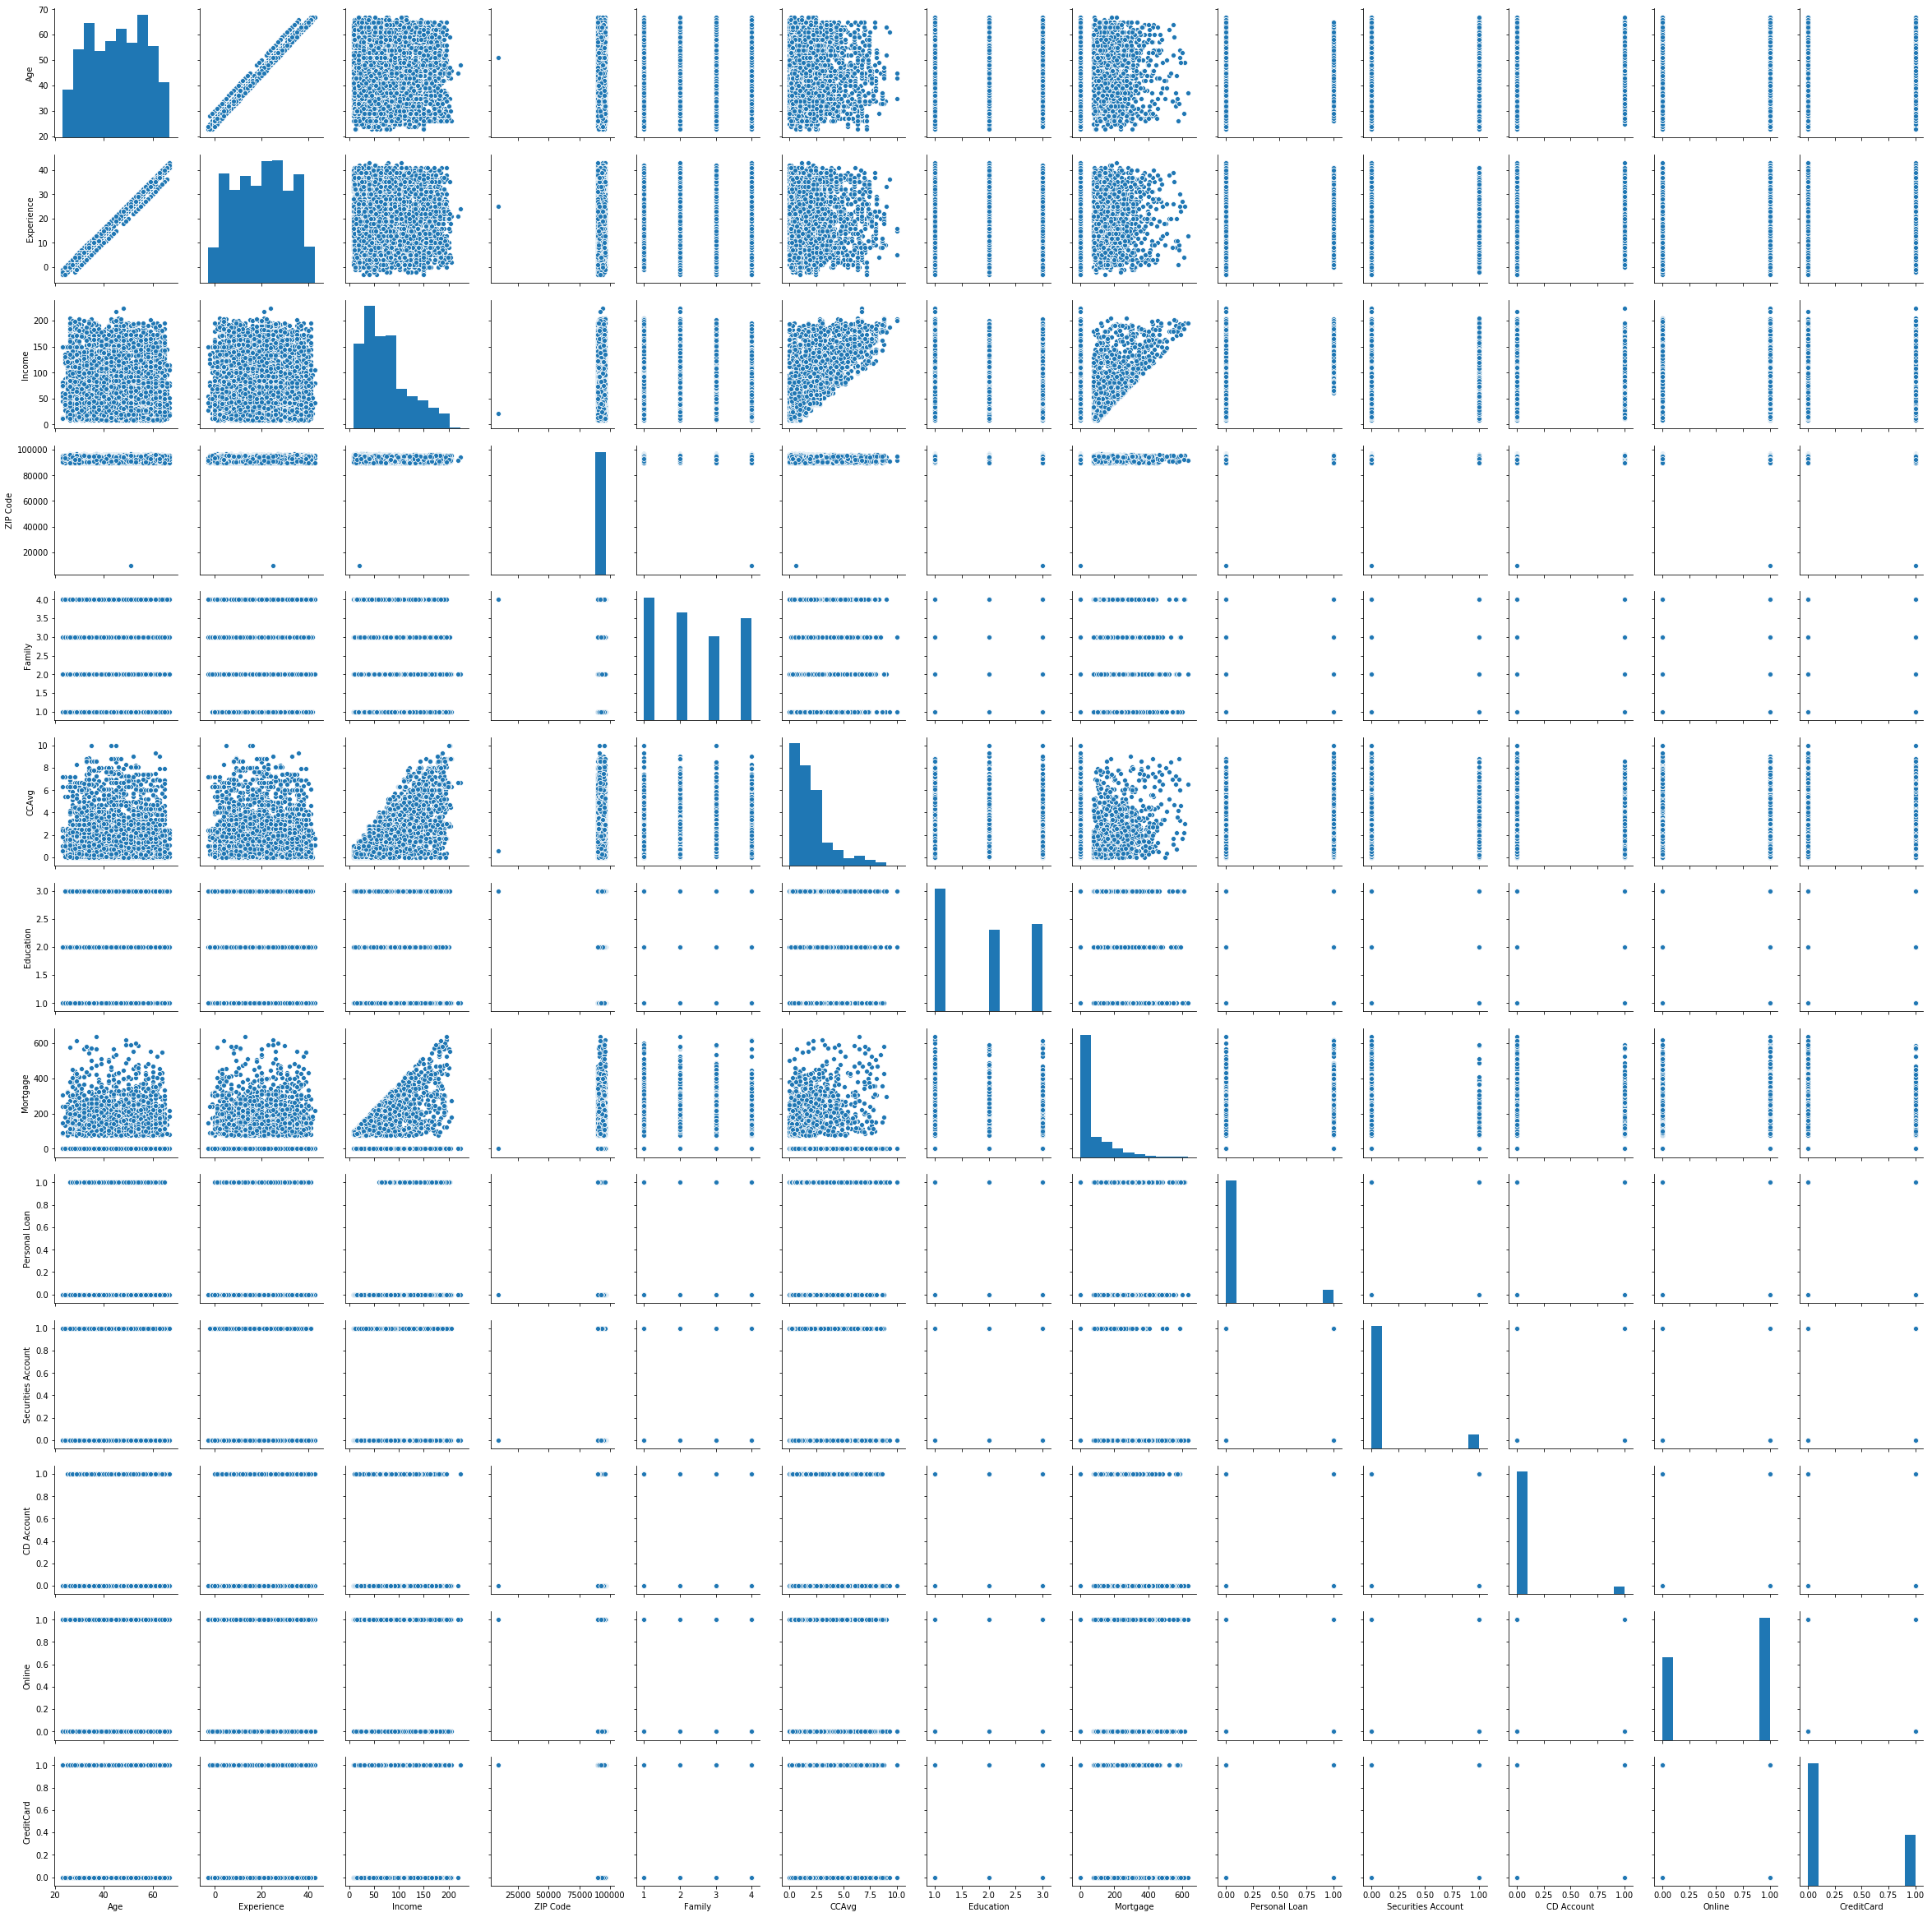

In [262]:
#Creating PAirPLot for Overall Understanding of all Attributes:
sns.pairplot(bank_df)     #pairplot

### Findings:

#### From the pairplot we can say that, all the independent attributes are not correlated to each other except for Age and Experience.
#### Its quite obvious, that ProfessionalExperince increases as Age increases. 

#### Age Feature: 
It can be observed that, age is normally distributed(mean = median) with majority of customers falling between 30 years and 60 years of age(Q1 = 35, Q3 = 55).

#### Experience Feature: 
It is also Normally distributed. From the Data Description it can be seen that mean is equal to median. 
However minimum value of Experience is "-3" which indicates
presence of negative values in the Experience attribute which hints at abnormality as Professional Experience cannot be negaive. 

#### Income Feature: 
Income looks to be positively skewed since the mean is greater than the median

#### CCAvg Feature: 
It is also a positively skewed attribute

#### The attributes viz. family and education are ordinal variables.

### Data Visualization: 

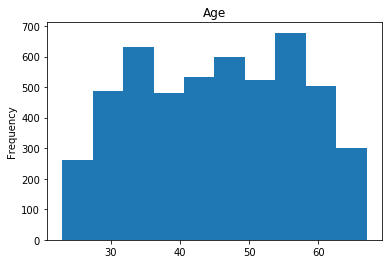

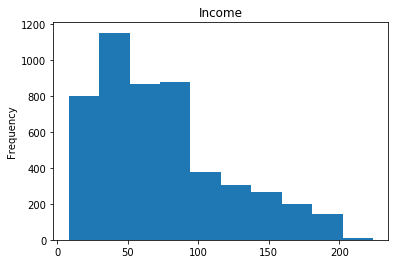

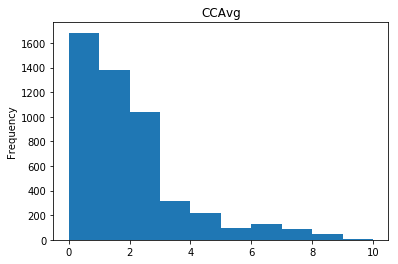

Text(0.5, 1.0, 'Mortgage')

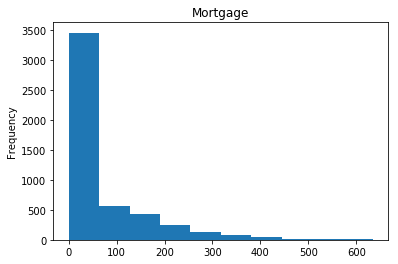

In [263]:
# Interval categories: experience, age, income, CC avg and mortgage.

## Age - 
bank_df.Age.plot('hist')
plt.title("Age")
plt.show()

## Income - Annual income in dollars (which income, what the scale is?)
bank_df.Income.plot('hist')
plt.title("Income")
plt.show()

## CCAvg - Average credit card spending
bank_df['CCAvg'].plot('hist')
plt.title("CCAvg")
plt.show()

## Mortgage - Value of House Mortgage
bank_df['Mortgage'].plot('hist')
plt.title("Mortgage")

###### Indepent Attributes: Experience Vs Age Correlation:

Text(0, 0.5, 'Experience')

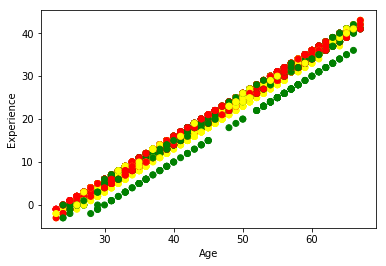

In [264]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bank_df['Age'], bank_df['Experience'],c = bank_df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Age')
plt.ylabel('Experience')


Inference:  The above plot show with experience and age have a positive correlation. As age increases Experience also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level.


### Task 3: Getting the Target Column Distribution:

#### Target Column(Personal Loan) Distribution:

###### Counts of Cusomers Opted/ Not Opted for Personal Loan

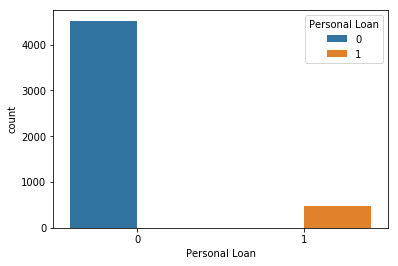

In [265]:
sns.countplot(x = 'Personal Loan', hue = "Personal Loan", data= bank_df)

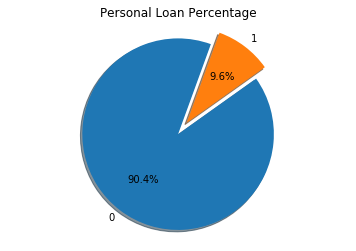

In [266]:
source_counts =pd.DataFrame(bank_df["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

Inference: Data is biased. Most of the Customer didnt opt for Personal Loan despite of the Campaign. Only 480 Customers were influenced from the Campaign.

#### Distribution of "Personal Loan" Values \n among Groups of "Education" Values

In [267]:
series_edu_3 = bank_df[bank_df['Education'] == 3]['Personal Loan'].value_counts()
series_edu_2 = bank_df[bank_df['Education'] == 2]['Personal Loan'].value_counts()
series_edu_1 = bank_df[bank_df['Education'] == 1]['Personal Loan'].value_counts()

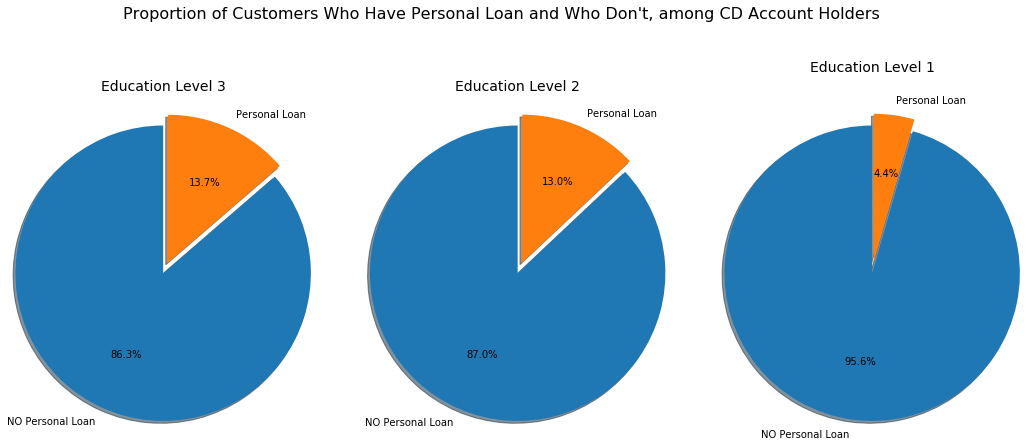

In [268]:
labels = ['NO Personal Loan','Personal Loan']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(series_edu_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Education Level 3',fontsize = 14, y = 1.1)

ax2.pie(series_edu_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Education Level 2', fontsize = 14, y = 1.1)

ax3.pie(series_edu_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90);
ax3.set_title('Education Level 1',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, among CD Account Holders', \
             fontsize = 16, y = 1.12);

plt.savefig('Proportion_of_PL_among edu_levels.png', bbox_inches = 'tight');

##### Inference:
We can say that the proportion of persons who have Personal Loan among them who has Third Level of Education: 13.7% 
and  persons who have Personal Loan among Second Level of Education: 13.0% 
is higher than proportion among people who has First level of Edication: 4.4%.



##### Distribution of Personal Loan Buyers w.r.t. Securities Account

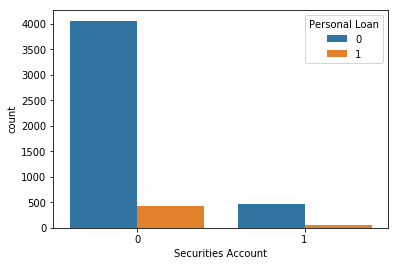

In [269]:
sns.countplot(x = "Securities Account", data = bank_df, hue = "Personal Loan")

Inference: From the above CountPlot it is observed that, Majority of Customers who does not have Loan have Securities Account.

##### Distribution of Personal Loan Attribute w.r.t. Family 

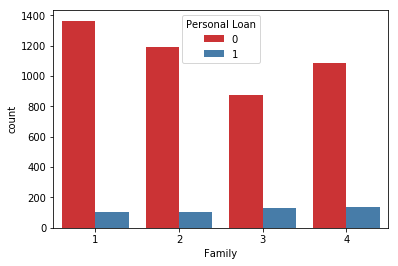

In [270]:
sns.countplot(x = 'Family', data= bank_df, hue= 'Personal Loan', palette='Set1')

Inference: There seems to be no relation between Family size and personal loan. But it can be seen families with size of 3 and 4 are more likely to take loan. It can be helpful for future campaign as this might be thought of as a good association.

#### Plotting Income Distribution: 

Text(0.5, 1.0, 'Income Distribution')

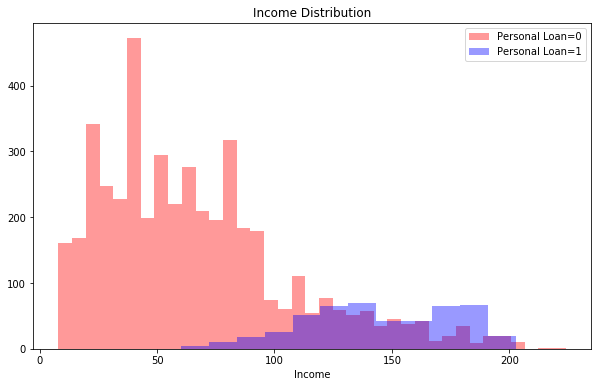

In [271]:
plt.figure(figsize=(10,6))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

#### Inference:
Customers with High Income are likely to take up a Loan

##### Distribution of Personal Loan Vs. CCAvg 

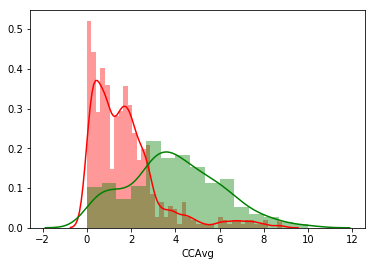

In [272]:
sns.distplot( bank_df[bank_df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( bank_df[bank_df['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [273]:
print('Credit card spending of Non-Loan customers: ', bank_df[bank_df['Personal Loan'] == 0]['CCAvg'].median())
print('Credit card spending of Loan customers    : ', bank_df[bank_df['Personal Loan'] == 1]['CCAvg'].median())

Credit card spending of Non-Loan customers:  1.4
Credit card spending of Loan customers    :  3.8


Inference: The graph show customers who have Personal Loan tend to have a higher credit card average. Average credit card spending(3.8) of a customer indicates a higher probability of personal loan. Lower credit card spending with a median of 1.4 is less likely to take a loan.

#### Feature Target Correlation Heat Map:
Lets check the Correlation between Feature Attributes and between Features-Target using Heat Map.
* Heatmap correlation:
Heatmap is one of simplest method to analyze feature correlation.
Heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
Heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target.

In [274]:
# Defining Features and Target:
feature = bank_df.drop(["Personal Loan"],axis=1)
target = bank_df["Personal Loan"]

##### Plotting Features Heat Map:

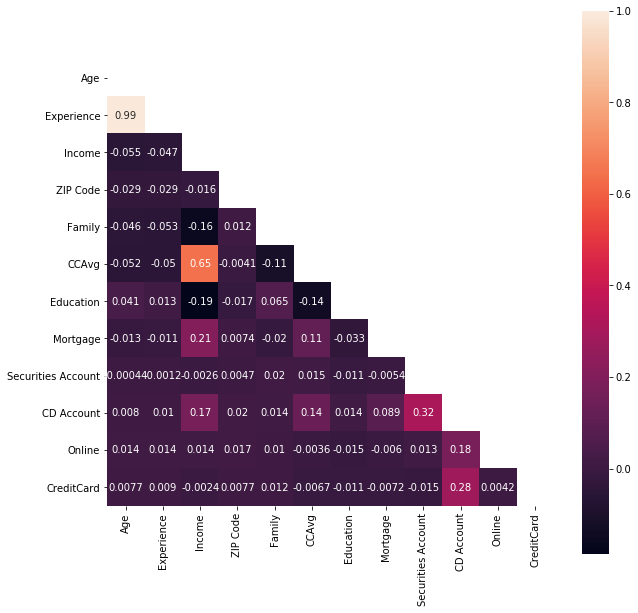

In [275]:
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

#### Inference: 
Age and Experience are Highly Correlated.
Income and CCAvg are moderately Correlated whilst other attributes are sparsely or Not Related.

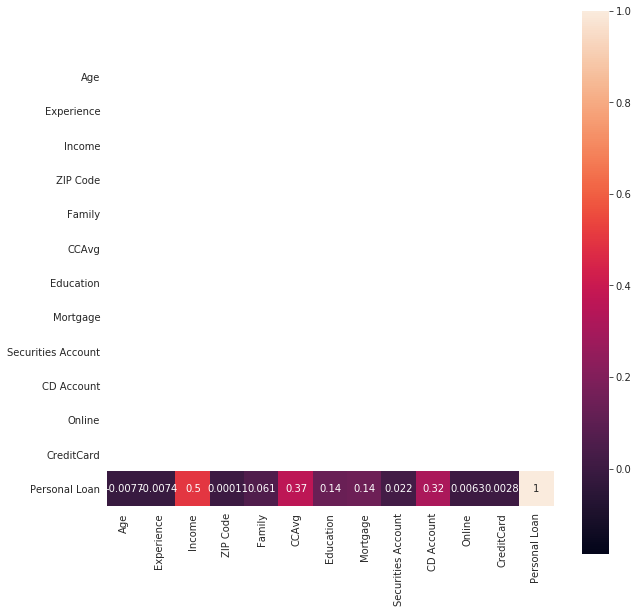

In [276]:
feature_target_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(feature_target_corr, annot=True,square=True,mask=mask)

#### Inference:
Of all the Attributes, Income is Strongly Correlated to Personal Loan. i.e. Customers with Higher Income availed the Personal Loan

### Task 4 of Iteratiion (1): Spliiting the Data into Train and Test Sets into 70:30 respectively for Logistic Regression: 

### Creating Models:


### Preparing Train and Test Sets:-

In [277]:
X = bank_df.drop('Personal Loan', axis = 1)


y = bank_df[['Personal Loan']]

# Splitting Train and Test Set in the Ratio 70:30 as Mentioned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Task 5. 1: Use Of Classification Models : Logistic Regression "to Predict likelihood of a liability customer buying Personal Loans: 

#### 1) Classification  using LOGISTIC REGRESSION

In [278]:
LR = LogisticRegression()            #Creating Instance of LogisticRegression
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [95]:
LR_score = LR.score(X_test, y_test)
print(LR_score)

0.9073333333333333


### Task 6.1: Printing Confusion Matrix for Logistic Regression:  

##### Confusion Matrix based on Logistice Regression Model

In [279]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1318   33]
 [ 106   43]]


Inference: Logistic Regression Predicted Non Loan Buyers(1318) Correctly. It made 33 Type 2 Error. It predicted 43 Loan Buyers accurately and made 106 Type 1 Error 

#### Plotting Precision Recall Curve

f1=0.382 auc=0.465 ap=0.470


Text(0, 0.5, 'Precision')

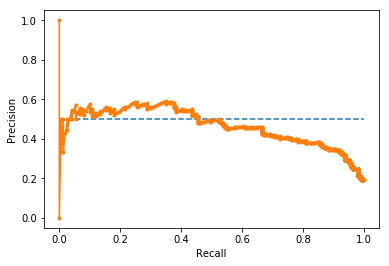

In [280]:
# predict probabilities
probs = LR.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

###### We have used Precision-Recall curve here over ROC as it is a convention  to use this curve when there is a moderate to large class imbalance. ROC is ideal to use when there are roughly equal numbers of observations for each class.

###### .

### Classification Using K-NN Algorithm:     

#### Instantiating K-Neighbor Classifier and Defining Value of K

In [281]:
### Task 5. 1: Use Of Classification Models : Logistic Regression "to Predict likelihood of a liability customer buying Personal Loans: 

#### Converting The Features to z Scores:

Scalimg is necessary for k-NN algorithm. Whenever we use dimensions which have different units of measurement, it is always safe to convert them into dimensionless quantity. It is known as Scaling. 
We are using Z-Score technique to achieve Scaling.

In [282]:
bank_df_z = bank_df.apply(zscore)   #Converts all attributes to zscale

In [283]:
bank_df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,-1.693312e-16,1.0001,-2.014911,-0.881204,-0.009122,0.862960,1.996667
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
ZIP Code,5000.0,1.513445e-15,1.0001,-39.519194,-0.585162,0.134093,0.686024,1.648959
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Education,5000.0,-6.315837e-16,1.0001,-1.049078,-1.049078,0.141703,1.332484,1.332484
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Personal Loan,5000.0,-5.565326e-16,1.0001,-0.325875,-0.325875,-0.325875,-0.325875,3.068659
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915


### Task 4 of Iteratiion (1): Spliiting the Data into Train and Test Sets into 70:30 respectively for KNN Algorithm: 

#### Preparing Train and Test Sets:-

In [284]:
#Capturing the Class Values from "Personal Loan" column into Pandas Series to Array
bank_labels = bank_df["Personal Loan"]

#Storing Normalized Feature Data into np Array
bank_df_z1 = bank_df_z.drop('Personal Loan', axis = 1)
X = np.array(bank_df_z1)

#Stroring bank_labels data into a seperate np array
y = np.array(bank_labels)

#Splitting X and y into training and test set in 70:30 Ratio as Mentioned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Task 5. 2: Use Of Classification Models : KNN Algorithm to Predict likelihood of a liability customer buying Personal Loans: 

#### Instantiating K-Neighbor Classifier and Defining Value of K

In [294]:
NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

#### Calling the NearestNeighbor Algorithm:- 

In [295]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

#### Testing Algorithm Effeciency:- 

In [296]:
# For Every test data point, predicting its label based on 5 Nearest Neighbors in the Model
# Majority Class will be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print(NNH_score)

0.9486666666666667


### Task 6.2: Printing Confusion Matrix for KNN Algorithm:  

#### Calculating Accuracy Measures and Confusion Matrix: 

In [297]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1344    7]
 [  70   79]]


Inference: K-NN Predicted Non Loan Buyers(1344) Correctly. It made only 07 Type 2 Error. It predicted 79 Loan Buyers accurately and made 70 Type 1 Error 

#### Plotting Precision Recall Curve

f1=0.382 auc=0.813 ap=0.773


Text(0, 0.5, 'Precision')

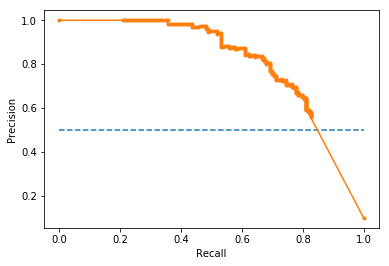

In [298]:
from sklearn.metrics import auc
# predict probabilities
probs = NNH.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Task 4 of Iteratiion (1): Spliiting the Data into Train and Test Sets into 70:30 respectively for Naive Bayes Algorithm: 

### Classification Using Naive Bayes Algorithm:   

#### Preparing Train and Test Set: 

In [299]:
X = bank_df.drop('Personal Loan', axis = 1)

y = bank_df[['Personal Loan']]

#Splitting X and y into training and test set in 70:30 Ratio as Mentioned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Task 5. 3: Use Of Classification Models : Naive Bayes to Predict likelihood of a liability customer buying Personal Loans: 

#### Instantiating Gaussian Model: 

In [300]:
NB = GaussianNB()

#Fitting the Model:
NB.fit(X_train, y_train)
print(NB)
expected = y_test
predicted = NB.predict(X_test)
NB_score = NB.score(X_test, y_test)
print(NB_score)

GaussianNB(priors=None, var_smoothing=1e-09)
0.884


### Task 6.3: Printing Confusion Matrix for Naive Bayes Algorithm:  

#### Summarizing the Fit of Model: 

In [301]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.44      0.57      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1241  110]
 [  64   85]]


#### Plotting Precision Recall Curve

f1=0.382 auc=0.535 ap=0.537


Text(0, 0.5, 'Precision')

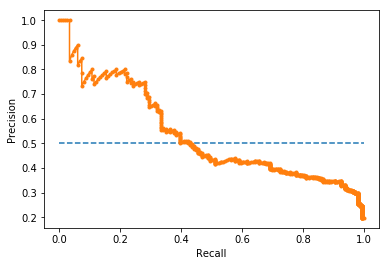

In [302]:
from sklearn.metrics import auc
# predict probabilities
probs = NB.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

##### Comparing Performance of Algorithms:

In [303]:
Accuracy_Comaprison = {'Logistic Regression': LR_score, 'Naive Bayes': NB_score, 'K-Nearest Neighbors': NNH_score}
print(Accuracy_Comaprison)

{'Logistic Regression': 0.9073333333333333, 'Naive Bayes': 0.884, 'K-Nearest Neighbors': 0.9486666666666667}


Thus, KNN Performed better than Logistic Regression and Naive Bayes. 

## Iteration2:-

#### Loading Dataframe Again:

In [304]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Data Preparation: 

##### 1. Dealing with Negative Experience:-
Assuming that -ve sign must have put by typing mistake in 52 records. We multiply those negative Experience Values by factor (-1)

In [305]:
#Finding number of records with negative Experience
bank_df[bank_df['Experience'] < 0]['Experience'].count()

52

In [306]:
#Dealing with negative vals:
def negExp(exp):
    if exp == -1:
        return 1
    elif exp == -2:
         return 2
    elif exp == -3:
         return 3
    else:
         return exp
    
bank_df["Experience"] = bank_df["Experience"].apply(negExp)

In [307]:
#Checking number of records with negative Experience
bank_df[bank_df['Experience'] < 0]['Experience'].count()

0

#### 2. Dealing With Mortgage Distribution(Extreme Positive Skewed Data)

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

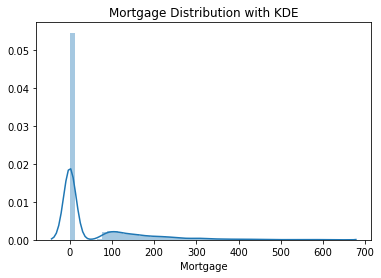

In [308]:
sns.distplot(bank_df["Mortgage"])
plt.title("Mortgage Distribution with KDE")

###### Inference:   
Data looks Highly Skewed on Positive Scale

Text(0.5, 1.0, 'Mortgage Distribution with KDE First Transformation')

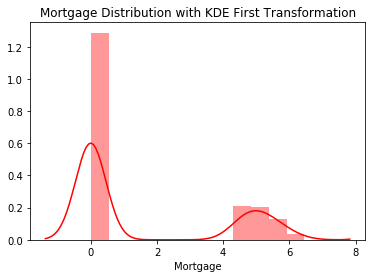

In [309]:
#Irregular values' handling 
SingleLog_y = np.log1p(bank_df["Mortgage"])              # Log transformation
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution with KDE First Transformation")

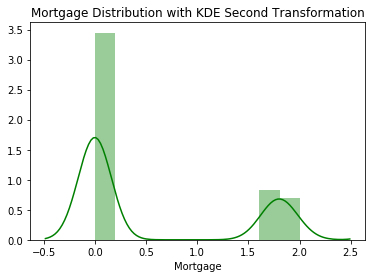

In [310]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution with KDE Second Transformation")
bank_df["Mortgage"] = DoubleLog_y

#### Inference:
Skewness Attended and treated Successfully

#### 3. Changing Variables Family and Education to 'Category' Type: 

In [311]:

# Education
bank_df['Education'] = bank_df['Education'].astype('category')
# Family
bank_df['Family'] = bank_df['Family'].astype('category')

#### 4. Dropping Unnecessary Columns: ZIP Code and ID:

In [312]:
bank_df.drop(['ID', 'ZIP Code'],  inplace=True, axis=1)

In [313]:
familydummy = pd.get_dummies(bank_df['Family'], prefix='Family')
bank_df = pd.concat([bank_df, familydummy], axis=1)      

In [314]:
edudummy =  pd.get_dummies(bank_df['Education'], prefix='Education')
bank_df = pd.concat([bank_df, edudummy], axis=1)  

In [315]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null float64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Family_1              5000 non-null uint8
Family_2              5000 non-null uint8
Family_3              5000 non-null uint8
Family_4              5000 non-null uint8
Education_1           5000 non-null uint8
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: category(2), float64(2), int64(8), uint8(7)
memory usage: 434.9 KB


In [316]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,1,0.0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,3,1.5,1,0.0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1,1.0,1,0.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0.0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0.0,0,0,0,0,1,0,0,0,1,0,1,0


In [317]:
bank_df.drop(['Education', 'Family'],  inplace=True, axis=1)

In [318]:
bank_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0.0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0.0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0.0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0.0,0,0,0,0,1,0,0,0,1,0,1,0


### Building Logistic Regression Model: 

#### Logistic Regression:
Creating and Spliiting Train Set and Test Set in 70:30 Ratio

In [319]:
X = bank_df.drop('Personal Loan', axis = 1)


y = bank_df[['Personal Loan']]

# Splitting Train and Test Set in the Ratio 70:30 as Mentioned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

#### Logistic Regression:
Instantiating and Fitting the Model:

In [320]:
LR = LogisticRegression()            #Creating Instance of LogisticRegression
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

#### Logistic Regression:
Evaluating Score of the Model:

In [321]:
lr_model_score = LR.score(X_test, y_test)
print(lr_model_score)

0.9546666666666667


#### Logistic Regression:
Evaluating Using Confusion Matrix:

In [322]:
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

[[1341   10]
 [  58   91]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.61      0.73       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



Inference: The LR Model True Positives: 1341. True Negatives: 91. Type 1 Errors: 58 Type 2 Errors: 10 

#### Logistic Regression:
Plotting Precision Recall Curve:

f1=0.728 auc=0.841 ap=0.841


Text(0, 0.5, 'Precision')

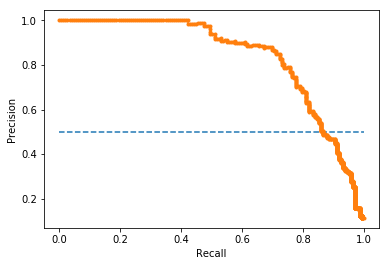

In [323]:
from sklearn.metrics import auc
# predict probabilities
probs = LR.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Classification Using KNN Algorithm:

#### KNN Algorithm:
Instantiating K-Neighbor Classifier and Defining Value of K:

In [324]:
NNH = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

#### KNN Algorithm:
##### Converting The Features to z Scores:
Whenever we use dimensions which have different units of measurement, it is always safe to convert them into dimensionless quantity. It is known as Scaling. We are using Z-Score technique to achieve Scaling.

In [325]:
bank_df_z = bank_df.apply(zscore)   #Converts all attributes to zscale

In [326]:
bank_df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,1.001421e-16,1.0001,-1.764019,-0.887906,-0.011792,0.864321,2.003268
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Mortgage,5000.0,-3.038902e-16,1.0001,-0.665621,-0.665621,-0.665621,1.405895,1.743743
Personal Loan,5000.0,-5.565326e-16,1.0001,-0.325875,-0.325875,-0.325875,-0.325875,3.068659
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
CD Account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146
Online,5000.0,2.986500e-16,1.0001,-1.216618,-1.216618,0.821951,0.821951,0.821951
CreditCard,5000.0,-3.697931e-16,1.0001,-0.645314,-0.645314,-0.645314,1.549632,1.549632


#### KNN Algorithm:
Preparing and Splitting Train and Test Sets:

In [327]:
#Capturing the Class Values from "Personal Loan" column into Pandas Series to Array
bank_labels = bank_df["Personal Loan"]

#Storing Normalized Feature Data into np Array
bank_df_z1 = bank_df_z.drop('Personal Loan', axis = 1)
X = np.array(bank_df_z1)

#Stroring bank_labels data into a seperate np array
y = np.array(bank_labels)

#Splitting X and y into training and test set in 70:30 Ratio as Mentioned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

####  KNN Algorithm:
Calling the NearestNeighbor Algorithm:-  

In [328]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

#### KNN Algorithm:
Evaluating Score of the Model:

In [329]:
# For Every test data point, predicting its label based on 5 Nearest Neighbors in the Model
# Majority Class will be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH_model_score = NNH.score(X_test, y_test)
print(NNH_model_score)

0.9566666666666667


#### KNN Algorithm:
Evaluating Using Confusion Matrix:

In [330]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1346    5]
 [  60   89]]


#### KNN Algorithm:
Plotting Precision Recall Curve:

f1=0.728 auc=0.824 ap=0.746


Text(0, 0.5, 'Precision')

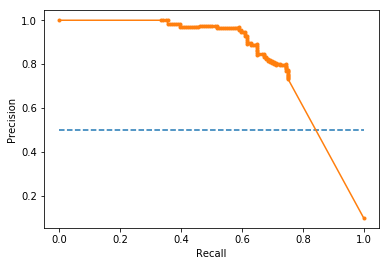

In [331]:
from sklearn.metrics import auc
# predict probabilities
probs = NNH.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Classification Using Naive Bayes Algorithm:   

#### Naive Bayes Classification: 
Preparing and Splitting Train and Test Sets:

In [332]:
X = bank_df.drop('Personal Loan', axis = 1)

y = bank_df[['Personal Loan']]

#Splitting X and y into training and test set in 70:30 Ratio as Mentioned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

#### Naive Bayes Classification:
Instantiating Gaussian Model:

In [333]:
NB = GaussianNB()

#Fitting the Model:
NB.fit(X_train, y_train)
print(NB)
expected = y_test
predicted = NB.predict(X_test)
NB_model_score = NB.score(X_test, y_test)
print(NB_model_score)

GaussianNB(priors=None, var_smoothing=1e-09)
0.8953333333333333


#### Naive Bayes Classification: 
Sumarizing the Fit of Model and Evaluating Using Confusion Matrix:

In [334]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.48      0.55      0.51       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.71      0.74      0.73      1500
weighted avg       0.90      0.90      0.90      1500

[[1261   90]
 [  67   82]]


#### Naive Bayes Classification:
Plotting Precision Recall Curve:

f1=0.728 auc=0.597 ap=0.599


Text(0, 0.5, 'Precision')

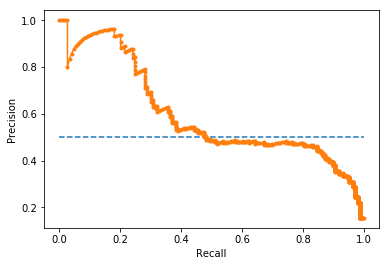

In [335]:
from sklearn.metrics import auc
# predict probabilities
probs = NB.predict_proba(X_test)
probs = probs[:, 1]

# calculate Recall Precision Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)


f1 = f1_score(y_test, y_predict)

# calculate AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')

### Task 7: Giving the Reasoning on which is the Best Model in this case and why it performs better?

#### Comparing Performances of Models: 

In [337]:
Accuracy_Comaprison = {'Logistic Regression': lr_model_score, 'Naive Bayes': NB_model_score, 'K-Nearest Neighbors': NNH_model_score}
print(Accuracy_Comaprison)

{'Logistic Regression': 0.9546666666666667, 'Naive Bayes': 0.8953333333333333, 'K-Nearest Neighbors': 0.9566666666666667}


#### From the above, we can see that k-NN algorithm with Iteration 2 ( Data Cleaning and Using Dummy Variables) gives us the best accuracy of 95.66%, as well as the least Type 1 (False Positive) and Type 2 (False Negative) errors.
#### In iteration 2, Efficiency all 3 Algorithms increased. Logistic Regression's Effeciency increased the most: almost 5%. 



##### Our Objective of Predicting likelihood of a liability customer buying Personal Loan is an example of 'Classification Problem'.
##### 3 Algorithms viz.
1. K-NNN
2. Naive Bayes and
3. Logistic Regression are Classification Algorithms with specific industry applications.

##### Naive Bayes Algorithm:
It is mainly considered in cases like: Categorizing news, email spam detection, face recognition, weather prediction etc. 
So here in our case, implementing Naive Bayes Algorithm was correct choice but problem with Naive Bayes is that it performs well in case of categorical input variables however its performance is degraded when it deals with numerical variable(s).
Thus, It would work efficiently on attributes like: Education, Family, Securities Account etc. but would be difficult in dealing with Continuous Data attributes like: Age, Income, CCAvg and Mortgage.



##### k-NN:
It is often used in search applications where we are looking for similar” items; that is, when our task is some form of “find items similar to this one”. 
We didnot see much deviation in results from Iteration 1 and Iteration 2 as it is not impacted by outliers and makes no assumptions about class distributions in Feature Space.


##### Logistic regression:
It is used to predict a discrete outcome based on variables which may be discrete, continuous or mixed. 
Thus, when the dependent variable(Personal Loan in this case) has two discrete outcomes, logistic regression is a commonly used technique. 
It predicts the probability of an event.
It does not require too many computational resources, it’s highly interpretable and doesn’t require input features to be scaled neither requires any tuning and it’s easy to regularize, and it outputs well-calibrated predicted probabilities.
Hence, Logistic Regression fits as one of the Best Model for this Thera Bank Dataset.

#### Result:
Thus, We can Use either k-NN or Logistic Regression for achieving our objective of: Predicting likelihood of a liability customer buying Personal Loan is an example of 'Classification Problem'
